Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea 

Importing datasets

In [2]:
datasets = pd.read_csv('fashion-mnist_train.csv')
datasets_1 = pd.read_csv('fashion-mnist_test.csv')

Visualization of datasets

In [3]:
datasets.shape

(60000, 785)

In [4]:
datasets_1.shape

(10000, 785)

In [5]:
training = np.array(datasets,dtype='float32')
testing = np.array(datasets_1,dtype='float32')

Visualing for example 1 image

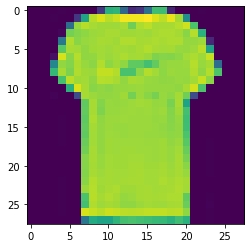

In [6]:
plt.imshow(training[10,1:].reshape(28,28))

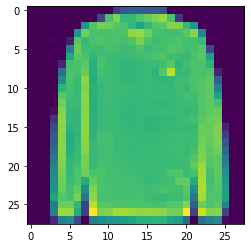

In [7]:
plt.imshow(training[70,1:].reshape(28,28))

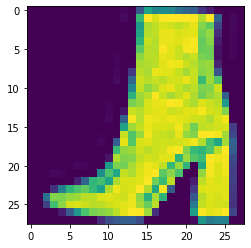

In [8]:
import random
i = random.randint(1,60000)

plt.imshow(training[i,1:].reshape(28,28))

Looking it in the form of matrix

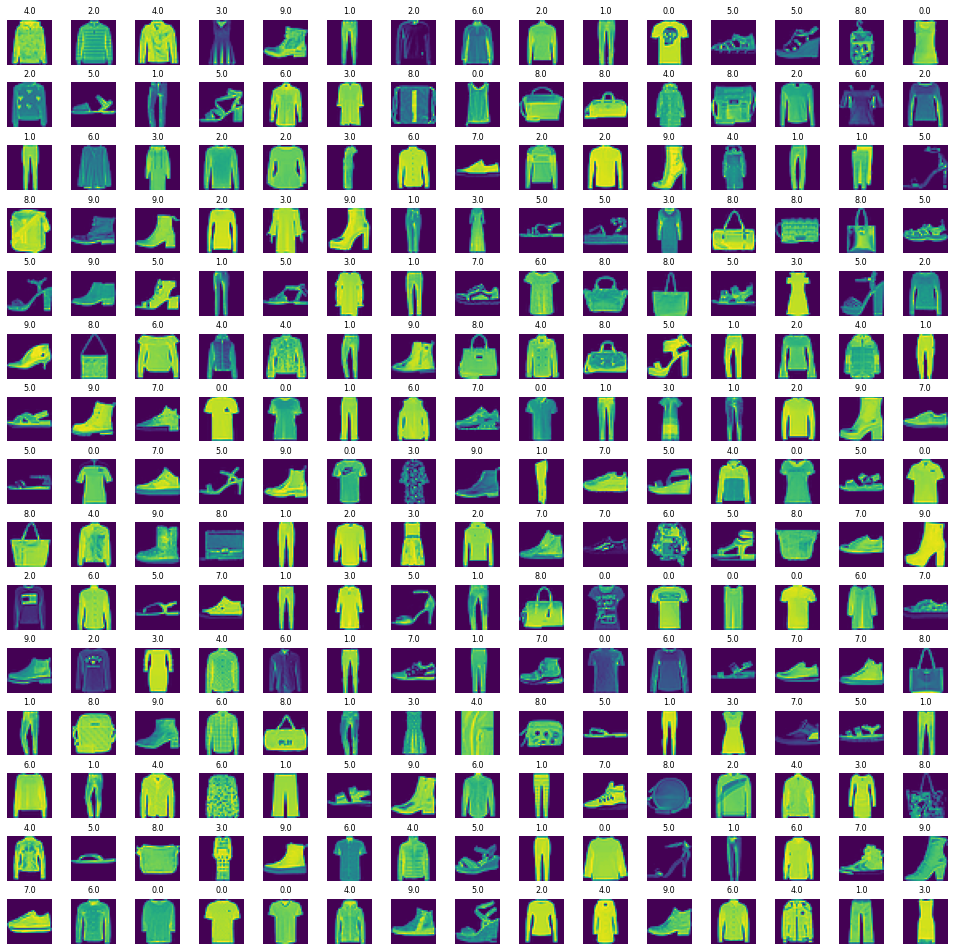

In [9]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid,W_grid,figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)

    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


Using CNN to displathe Fashion Lib

In [10]:
x_train = training[:,1:]/255
y_train = training[:,0]


In [11]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [12]:
#validation datasets

from sklearn.model_selection import train_test_split
x_train, x_validate ,y_train, y_vaidate = train_test_split(x_train,y_train, test_size = 0.2, random_state = 12345) 

In [13]:
print(x_validate)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(y_vaidate)

[7. 3. 3. ... 0. 7. 4.]


In [15]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [16]:
print(x_train.shape)

(48000, 28, 28, 1)


In [17]:
print(x_test.shape)

(10000, 28, 28, 1)


In [18]:
print(x_validate.shape)

(12000, 28, 28, 1)


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
cnn_model = Sequential()

In [21]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

In [22]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
cnn_model.add(Flatten())

In [24]:
cnn_model.add(Dense(32 , activation = 'relu'))

In [25]:
cnn_model.add(Dense(10 , activation = 'sigmoid'))

In [26]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [27]:
epochs = 50

In [28]:
cnn_model.fit(x_train, y_train , batch_size=512, epochs = epochs, verbose=1, validation_data= (x_validate,y_vaidate))

Epoch 1/50


94/94 [==============================] - 3s 23ms/step - loss: 1.3977 - accuracy: 0.5527 - val_loss: 0.8085 - val_accuracy: 0.7172
Epoch 2/50
94/94 [==============================] - 2s 19ms/step - loss: 0.7088 - accuracy: 0.7466 - val_loss: 0.6449 - val_accuracy: 0.7631
Epoch 3/50
94/94 [==============================] - 2s 20ms/step - loss: 0.6102 - accuracy: 0.7791 - val_loss: 0.5843 - val_accuracy: 0.7947
Epoch 4/50
94/94 [==============================] - 2s 20ms/step - loss: 0.5620 - accuracy: 0.7974 - val_loss: 0.5489 - val_accuracy: 0.8011
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5315 - accuracy: 0.8085 - val_loss: 0.5211 - val_accuracy: 0.8151
Epoch 6/50
94/94 [==============================] - 2s 21ms/step - loss: 0.5082 - accuracy: 0.8161 - val_loss: 0.5032 - val_accuracy: 0.8199
Epoch 7/50
94/94 [==============================] - 2s 20ms/step - loss: 0.4885 - accuracy: 0.8241 - val_loss: 0.4892 - val_accuracy: 0.8241
Epoch 8/50
94/94 [======

Evaluationg The Model

In [ ]:
evaluation = cnn_model.evaluate(x_test,y_test)
print('test accuracy :(:.3f)'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.8707
test accuracy :(:.3f)


In [ ]:
predicted_classes = cnn_model.predict_generator(x_test)
predicted_classes_2 = cnn_model.predict_step(x_test)
predicted_classes_3 = cnn_model.predict_on_batch(x_test)

C:\Users\Siddharth tyagi\AppData\Local\Temp\ipykernel_18984\2131429928.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_classes = cnn_model.predict_generator(x_test)


In [ ]:
print(predicted_classes)
print(predicted_classes_2)
print(predicted_classes_3)

[[9.9816191e-01 1.1131811e-04 4.9461037e-01 ... 3.3049138e-10
  1.0956079e-01 5.6401843e-09]
 [8.6986259e-02 9.9999803e-01 1.0854403e-03 ... 1.2411637e-07
  3.9606146e-03 1.6228548e-04]
 [8.4143353e-01 1.4747797e-03 9.8754132e-01 ... 3.6979095e-08
  3.5259504e-02 1.1811254e-05]
 ...
 [2.0142510e-03 1.0485682e-05 9.7294459e-03 ... 3.9625544e-02
  9.9482715e-01 1.2163198e-04]
 [8.7742054e-01 1.1027413e-03 5.4576653e-01 ... 3.8043396e-07
  9.9704581e-01 1.2519141e-03]
 [8.0056980e-02 9.6454358e-01 4.5478466e-01 ... 2.8906204e-09
  6.7718185e-02 2.8017144e-05]]
tf.Tensor(
[[9.9816191e-01 1.1131811e-04 4.9461037e-01 ... 3.3049138e-10
  1.0956079e-01 5.6401843e-09]
 [8.6986259e-02 9.9999803e-01 1.0854403e-03 ... 1.2411637e-07
  3.9606146e-03 1.6228548e-04]
 [8.4143353e-01 1.4747797e-03 9.8754132e-01 ... 3.6979095e-08
  3.5259504e-02 1.1811254e-05]
 ...
 [2.0142510e-03 1.0485682e-05 9.7294459e-03 ... 3.9625544e-02
  9.9482715e-01 1.2163198e-04]
 [8.7742054e-01 1.1027413e-03 5.4576653e-01 ... 

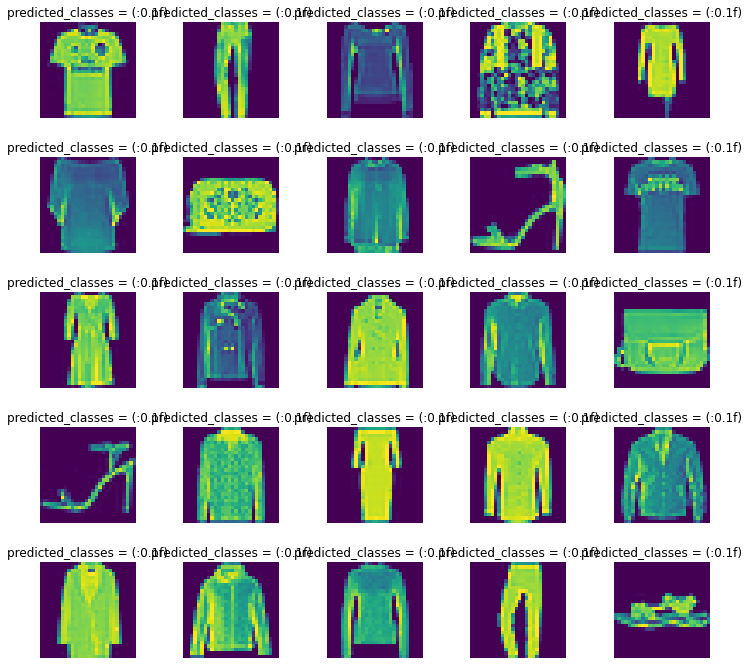

In [ ]:
L = 5
W = 5

fig ,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel() 

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i].reshape((28,28)))
    axes[i].set_title("predicted_classes = (:0.1f)".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)